In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850


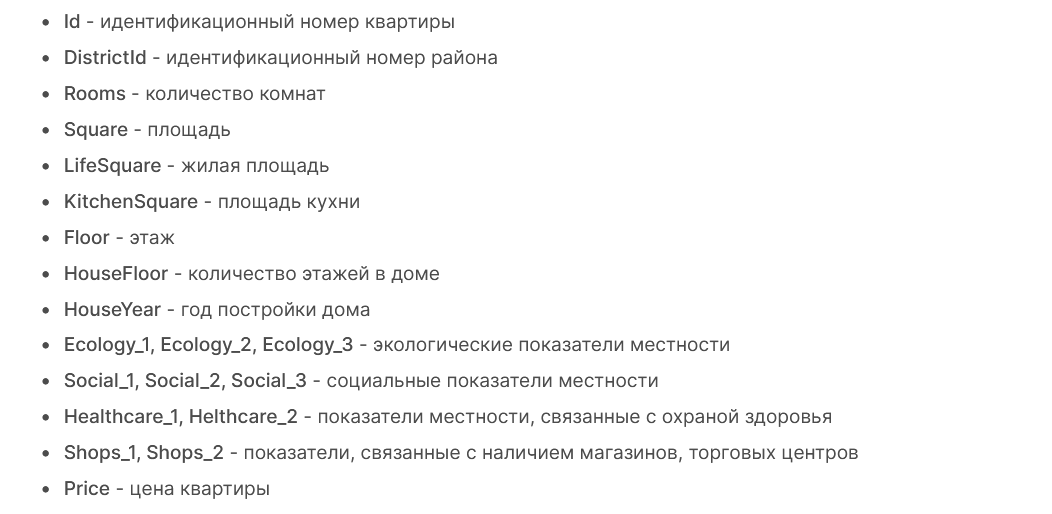

In [4]:
df.shape

(10000, 20)

#### 1. Удалим поле идентификатора объекта, а также преобразуем год постройки в возраст дома

In [5]:
df = df.drop(columns = ['Id'])

In [6]:
df['HouseYear'].unique()

array([    2014,     1966,     1988,     1977,     1972,     1968,
           1986,     2008,     1978,     2012,     1969,     2003,
           1981,     1962,     2015,     2018,     1976,     1985,
           1960,     2019,     1974,     1956,     1963,     1961,
           1979,     2006,     1953,     1973,     1982,     1965,
           2007,     2013,     1983,     1995,     1971,     2017,
           1964,     1991,     1990,     2016,     2011,     1984,
           1993,     1997,     2009,     1975,     2010,     1987,
           1935,     1970,     1967,     1989,     1959,     1996,
           2005,     1994,     1958,     2004,     1998,     1992,
           1980,     2000,     2002,     1954,     2001,     1999,
           1917,     1955,     1957,     1934,     2020,     1932,
           1942,     1940,     1937,     1941,     1939,     1931,
           1951,     1912,     1918,     1952,     1919,     1936,
           1930,     1938,     1950,     1933,     1929,     1

In [7]:
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = 2008

In [8]:
df['HouseYear'].describe()

count    10000.00000
mean      1984.86600
std         18.41187
min       1910.00000
25%       1974.00000
50%       1977.00000
75%       2001.00000
max       2020.00000
Name: HouseYear, dtype: float64

In [9]:
def age(row):
    row['HouseAge'] = 2020 - row['HouseYear']
    return row
df = df.apply(age, axis=1)

In [10]:
df = df.drop(columns = ['HouseYear'])

In [11]:
df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseAge
0,27,3.0,115.027311,NaN,10.0,4,10.0,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089,6
1,22,1.0,39.832524,23.169223,8.0,7,8.0,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407,54
2,1,3.0,78.342215,47.671972,10.0,2,17.0,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850,32


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   Ecology_1      10000 non-null  float64
 8   Ecology_2      10000 non-null  object 
 9   Ecology_3      10000 non-null  object 
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   5202 non-null   float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Shops_2        10000 non-null  object 
 17  Price          10000 non-null  float64
 18  HouseAg

#### 2. Поле "Жилая площадь" содержит значения NaN. Будем заполнять его, исходя из пропорции, которую высчитаем на значениях, не содержащих NaN

In [13]:
df['Square'].median(), df['LifeSquare'].median()

(52.51330992401352, 32.781260192155735)

In [14]:
life_s_proportion = df['LifeSquare'].median() / df['Square'].median()
life_s_proportion

0.6242466955442353

In [15]:
def fillLS(row):
    if pd.isna(row['LifeSquare']):
        row['LifeSquare'] = row['Square'] * life_s_proportion
    return row
df = df.apply(fillLS, axis=1)

In [16]:
df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseAge
0,27,3.0,115.027311,71.805419,10.0,4,10.0,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089,6
1,22,1.0,39.832524,23.169223,8.0,7,8.0,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407,54
2,1,3.0,78.342215,47.671972,10.0,2,17.0,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850,32


#### 3. Поле KitchenSquare содержит значения, превышающие жилую площадь, значения, равные нулю, а также значения, не превышающие 4 кв.м. Будем считать, что для квартир меньше 40 квадратных метров кухня площадью 0 означает отсутствие кухни. Если же площадь кухни меньше 4 кв.м или превышает жилую площадь квартиры, будем считать ее по пропорции

In [17]:
df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [18]:
np.where(df['KitchenSquare'] > df['LifeSquare'])[0].shape

(24,)

In [19]:
np.where(df['KitchenSquare'] < 3.5)[0].shape

(3183,)

In [20]:
np.where(df['KitchenSquare'] == 0)[0].shape

(697,)

In [21]:
kitchen_median = df.iloc[np.where(df['KitchenSquare'] >= 4.0) and np.where(df['KitchenSquare'] < df['LifeSquare'])]['KitchenSquare'].median()
kitchen_median

6.0

In [22]:
life_median = df['LifeSquare'].median()
life_median

33.290489694924794

In [23]:
kitchen_proportion = kitchen_median / life_median
kitchen_proportion

0.1802316533936331

In [24]:
def fillKitchen(row):
    if row['KitchenSquare'] == 0 and row['Square'] < 40:
        return row
    if row['KitchenSquare'] >= row['LifeSquare'] or row['KitchenSquare'] < 4.0:
        row['KitchenSquare'] = row['LifeSquare'] * kitchen_proportion
    return row
df = df.apply(fillKitchen, axis=1)

In [25]:
df['KitchenSquare'].describe()

count    10000.000000
mean         7.999048
std         13.990027
min          0.000000
25%          6.000000
50%          8.000000
75%          9.425902
max       1348.239488
Name: KitchenSquare, dtype: float64

#### 4. Имеется 8 объектов с нулем комнат, при этом ничего выдающегося с точки зрения площади или чего-либо еще в этих объектах нет. Некоторые объекты имеют неадекватное площади количество комнат. Определим зависимость количества комнат от площади квартиры по ненулевым значениям датасета и заполним эти 8 значений

In [26]:
np.where(df['Rooms'] == 0)[0].shape

(8,)

In [27]:
df.iloc[np.where(df['Rooms'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseAge
2194,88,0.0,38.697117,19.345131,9.000000,9,16.0,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646,38
3780,27,0.0,41.790881,26.087820,4.701851,13,0.0,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788,43
5894,28,0.0,49.483501,30.889912,5.567340,16,0.0,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463,5
6401,27,0.0,87.762616,85.125471,15.342304,5,15.0,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007,43
7644,27,0.0,212.932361,211.231125,38.070535,2,3.0,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887,12
7929,6,0.0,81.491446,50.870766,9.168522,4,0.0,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112,43
9767,27,0.0,138.427694,136.215499,24.550345,4,3.0,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389,4
9869,27,0.0,2.377248,0.873147,0.000000,1,0.0,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798,43


In [28]:
for i, frame in df.groupby('Rooms'):
    print(i, frame['Square'].mean(), frame['Square'].std())

0.0 81.6203580882021 66.81392017429307
1.0 41.32327748796117 11.427650776575648
2.0 56.78821360752935 16.846587974043757
3.0 76.90323406052028 15.725388276577975
4.0 98.37754356017348 23.819556390506644
5.0 122.61494139178701 54.56736064770863
6.0 59.41433379627719 nan
10.0 59.96412034862395 1.2828972269140868
19.0 42.00604570550408 nan


In [29]:
rooms_voc = {48: 2, 66: 3, 86: 4, 110: 5}

In [30]:
def rooms(row):
    if row['Rooms'] == 0 or row['Rooms'] >= 6:
        rooms = 1
        for k, v in rooms_voc.items():
            if row['Square'] > k:
                rooms = v
        row['Rooms'] = rooms
    return row
df = df.apply(rooms, axis = 1)

#### 5. Существуют объекты, чей этаж превышает общее количество этажей в доме. Будем заменять в этом случае этаж максимальным значением.

In [31]:
np.where(df['Floor'] > df['HouseFloor'])[0].shape

(1825,)

In [32]:
df.loc[np.where(df['Floor'] > df['HouseFloor'])].head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseAge
17,8,2.0,49.396000,28.299600,5.000000,6,5.0,0.458174,B,A,26,4439,1,1130.0,1,5,B,186971.926566,58
19,45,1.0,42.367289,40.012529,7.211524,16,14.0,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777,5
21,20,3.0,75.611065,47.494621,8.000000,11,9.0,0.019509,B,B,37,7687,11,176.0,5,5,B,366916.246494,44
24,27,1.0,44.203947,27.594168,4.973342,2,0.0,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958,43
25,6,2.0,65.409965,40.831955,7.359211,18,1.0,0.243205,B,B,5,1564,0,540.0,0,0,B,191205.272608,43


In [33]:
def set_floor(row):
    if row['Floor'] > row['HouseFloor']:
        row['Floor'] = row['HouseFloor']
    return row
df = df.apply(set_floor, axis = 1)

#### 5. Некоторые значения Healthcare_1 равны NaN. Будем заполнять такие значения значениями, средними для данного района. Если для района все значения равны NaN, будем брать значения соседних районов

In [34]:
health_dict = {}
for i, frame in df.groupby('DistrictId'):
    health_dict[i] = frame['Healthcare_1'].mean()

In [35]:
def healthcare_1(row):
    if pd.isna(row['Healthcare_1']):
        if not pd.isna(health_dict[row['DistrictId']]):
            row['Healthcare_1'] = health_dict[row['DistrictId']]
        else:
            current_id = row['DistrictId']
            for i in range(current_id, np.max(list(health_dict.keys())) + 1):
                if i in health_dict:
                    if not pd.isna(health_dict[i]):
                        row['Healthcare_1'] = health_dict[i]
                        break
    return row
df = df.apply(healthcare_1, axis = 1)

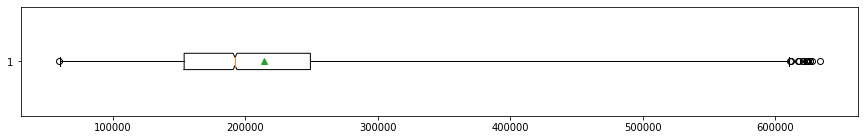

In [36]:
fig, ax = plt.subplots(figsize=(15,2)) 
bp = ax.boxplot(df['Price'], showmeans = True, notch = True, vert = False, whis = (0.0015, 99.85))

In [37]:
df = df[df['Price'] <= 600000]

#### Проведем все те же манипуляции с тестовым датафреймом

In [38]:
df_test = pd.read_csv('test.csv')

In [39]:
df_test.loc[df_test['DistrictId'] == 210, 'Healthcare_1'] = health_dict[209]
df_test.loc[df_test['DistrictId'] == 211, 'Healthcare_1'] = health_dict[209]
df_test.loc[df_test['DistrictId'] == 212, 'Healthcare_1'] = health_dict[209]

In [40]:
df_test = df_test.drop(columns = ['Id'])
df_test = df_test.apply(age, axis=1)
df_test = df_test.drop(columns = ['HouseYear'])
df_test = df_test.apply(fillLS, axis=1)
df_test = df_test.apply(fillKitchen, axis=1)
df_test = df_test.apply(rooms, axis = 1)
df_test = df_test.apply(set_floor, axis = 1)
df_test = df_test.apply(healthcare_1, axis = 1)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     5000 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   float64
 6   HouseFloor     5000 non-null   float64
 7   Ecology_1      5000 non-null   float64
 8   Ecology_2      5000 non-null   object 
 9   Ecology_3      5000 non-null   object 
 10  Social_1       5000 non-null   int64  
 11  Social_2       5000 non-null   int64  
 12  Social_3       5000 non-null   int64  
 13  Healthcare_1   5000 non-null   float64
 14  Helthcare_2    5000 non-null   int64  
 15  Shops_1        5000 non-null   int64  
 16  Shops_2        5000 non-null   object 
 17  HouseAge       5000 non-null   int64  
dtypes: float

#### Учим модель

In [42]:
df.head(3)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseAge
0,27,3.0,115.027311,71.805419,10.0,4.0,10.0,0.075424,B,B,11,3097,0,1174.288462,0,0,B,305018.871089,6
1,22,1.0,39.832524,23.169223,8.0,7.0,8.0,0.118537,B,B,30,6207,1,1183.000000,1,0,B,177734.553407,54
2,1,3.0,78.342215,47.671972,10.0,2.0,17.0,0.025609,B,B,33,5261,0,240.000000,3,1,B,282078.720850,32


In [43]:
categorical_features = ['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [44]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

In [45]:
parameters = {'iterations' : [400, 500, 600], 
              'learning_rate' : [0.1], 
              'depth' : [6, 7, 8]}
reg = CatBoostRegressor(silent=True, cat_features=categorical_features)
reg = GridSearchCV(reg, parameters, scoring='r2')

In [46]:
train_columns = list(df.columns)
train_columns.remove('Price')

In [47]:
reg.fit(df[train_columns], df['Price']);

In [48]:
reg.best_params_

{'depth': 7, 'iterations': 400, 'learning_rate': 0.1}

In [49]:
predicted_prices = reg.predict(df_test)

In [50]:
df_test = pd.read_csv('test.csv')

In [51]:
df_submit = df_test[['Id']]

In [52]:
df_prices = pd.DataFrame.from_dict({'Price':predicted_prices})

In [53]:
df_submit = df_submit.join(df_prices)

In [54]:
df_submit = df_submit.set_index('Id', drop=True)

In [55]:
df_submit.head()

,Price
Id,
4567,162168.620400
5925,115490.489578
960,145870.600537
3848,104589.698539
746,197731.990874


In [56]:
df_submit.to_csv('submission.csv')